<a href="https://colab.research.google.com/github/alekyapopuri96/DataVizFall2020_Colab/blob/master/Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [ ]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"

## loading data into dataframe
##df = pd.DataFrame(db)

# Explore data

In [ ]:
df = pd.read_csv(db)

df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [ ]:
df.nunique()

date        233
county     1921
state        55
fips       3203
cases     15918
deaths     2375
dtype: int64

In [ ]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
fips_for_bristol = df[(df['county'] == 'Bristol') &(df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')
fips_for_suffolk = df[(df['county'] == 'Suffolk') &(df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')

print(f'bristol = {fips_for_bristol}')
print(f'suffolk = {fips_for_suffolk}')

bristol = 25005
suffolk = 25025


In [ ]:
def get_county_stat(df,fips):
  Bristol_fips = df[df['fips'] == fips][['date','county','state','cases','deaths']].copy()
  Bristol_fips.set_index('date',inplace = True)
  Bristol_fips.index = pd.to_datetime(Bristol_fips.index)
  return Bristol_fips

get_county_stat(df,fips_for_bristol).head()

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0


## Explore data type

In [ ]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)


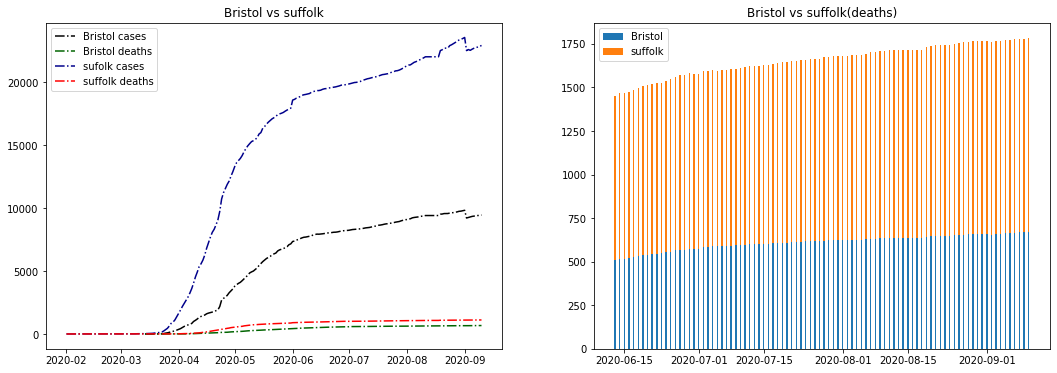

In [88]:
f,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(df_Bristol.index,df_Bristol.cases,'-.',color = 'black', label = 'Bristol cases')
ax[0].plot(df_Bristol.index,df_Bristol.deaths,'-.',color = 'darkgreen', label = 'Bristol deaths')

ax[0].plot(df_Suffolk.index,df_Suffolk.cases,'-.',color = 'darkblue', label = 'sufolk cases')
ax[0].plot(df_Suffolk.index,df_Suffolk.deaths,'-.',color = 'red', label = 'suffolk deaths')

width = 0.3
past = -90
bar_axis1= ax[1].bar(df_Bristol.index[past:], df_Bristol.deaths[past:],width,label='Bristol')
bar_axis2= ax[1].bar(df_Suffolk.index[past:], df_Suffolk.deaths[past:],width,bottom = df_Bristol.deaths[past:],label='suffolk')
ax[0].set_title('Bristol vs suffolk')
ax[1].set_title('Bristol vs suffolk(deaths)')
ax[0].legend()
ax[1].legend()


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





In [80]:
#df.max()

highest_cases = df.groupby(['fips']).max().sort_values(by=['cases'], ascending=False)
highest_cases.head(10)


#counties_cases_deaths_max = df[df['fips'] == fips][['county','cases','deaths']].copy()
#print(f'{counties_cases_deaths_max}')

,date,county,state,cases,deaths
fips,,,,,
06037,2020-09-10,Los Angeles,California,251024,6128
12086,2020-09-10,Miami-Dade,Florida,162893,2789
04013,2020-09-10,Maricopa,Arizona,136571,3133
17031,2020-09-10,Cook,Illinois,132966,5103
48201,2020-09-10,Harris,Texas,113504,2363
48113,2020-09-10,Dallas,Texas,77948,1021
12011,2020-09-10,Broward,Florida,73869,1258
32003,2020-09-10,Clark,Nevada,61871,1240
06065,2020-09-10,Riverside,California,54868,1094


In [81]:
highest_death=df.groupby(['fips']).max().sort_values(by=['deaths'], ascending=False)
highest_death.head(10)

,date,county,state,cases,deaths
fips,,,,,
06037,2020-09-10,Los Angeles,California,251024,6128
17031,2020-09-10,Cook,Illinois,132966,5103
04013,2020-09-10,Maricopa,Arizona,136571,3133
26163,2020-09-10,Wayne,Michigan,32877,2941
12086,2020-09-10,Miami-Dade,Florida,162893,2789
36059,2020-09-10,Nassau,New York,45445,2706
48201,2020-09-10,Harris,Texas,113504,2363
34013,2020-09-10,Essex,New Jersey,20820,2121
25017,2020-09-10,Middlesex,Massachusetts,27732,2094


## Death rate Per FIPS 

In [ ]:
#result=df[['deaths','county']]['fips']
#result = df[(df['county'] == 'Bristol') &(df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')
#result.tail(10)
#print(f'{result}')
#df[['county','deaths']].value_counts()

In [87]:
highest_death['death_rate']= highest_death['cases']/highest_death['deaths']
highest_death.sort_values(by=['death_rate'], ascending=False)

,date,county,state,cases,deaths,death_rate
fips,,,,,,
41027,2020-09-10,Hood River,Oregon,238,0,inf
72121,2020-09-10,Sabana Grande,Puerto Rico,174,0,inf
39121,2020-09-10,Noble,Ohio,23,0,inf
72125,2020-09-10,San German,Puerto Rico,206,0,inf
18075,2020-09-10,Jay,Indiana,153,0,inf
...,...,...,...,...,...,...
36073,2020-09-10,Orleans,New York,318,55,5.781818
23027,2020-09-10,Waldo,Maine,72,14,5.142857
54073,2020-09-10,Pleasants,West Virginia,15,3,5.000000


## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)

In [68]:
#base map
#m = folium.Map()
# transferring the data into json

#weekly_cases = db.json()


#m

import json
from datetime import datetime
df['date'] = df['date'].astype('datetime64[ns]')
weekly_data = df.groupby("county").resample('W-Wed', label='right', closed = 'right', on='date').sum().reset_index().sort_values(by='date')
#weekly_data_json = weekly_data.json()
print(weekly_data)


            county       date      fips  cases  deaths
39102    Snohomish 2020-01-22  106122.0      2       0
10215         Cook 2020-01-29  102186.0      6       0
25168  Los Angeles 2020-01-29   24148.0      4       0
39103    Snohomish 2020-01-29  371427.0      7       0
26185     Maricopa 2020-01-29   16052.0      4       0
...            ...        ...       ...    ...     ...
23014        Knott 2020-09-16   21119.0     97       1
36347    Roscommon 2020-09-16   26143.0     82       4
23041         Knox 2020-09-16  273973.0   9956     110
36412         Ross 2020-09-16   39141.0    808      16
47293      Ziebach 2020-09-16   46137.0     58       0

[47294 rows x 5 columns]


In [ ]:
import json


In [71]:
def Folium_Choropleth(type = 'cases',date=''):
  df = pd.read_csv(db, dtype={"fips": str})
  df['date'] = pd.to_datetime(df['date'])

  


TypeError: ignored